In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [56]:
# 设置随机种子
seed_value = 2023
np.random.seed(seed_value)

In [57]:
# 导入数据

iris_dataset = load_iris()
train_x,test_x,train_y,test_y=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=2)
X_train_2d = train_x[:, :2]  # 我们只取前两个特征
X_test_2d = test_x[:, :2]

In [58]:
# 训练K近邻模型
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train_2d, train_y)

KNeighborsClassifier(n_neighbors=10)

In [59]:
# 结果
# y_train_pred = model.predict(X_train)
score_test = model.score(X_test_2d, test_y)
print('测试集Accuracy: ', score_test)

测试集Accuracy:  0.7631578947368421


In [60]:
# 创建网格
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
# 使用模型预测网格中每个点的类别
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\15486\AppData\Local\Temp\ipykernel_1648\1216047655.py:5: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=test_y, edgecolors='r', marker='x', s=50)


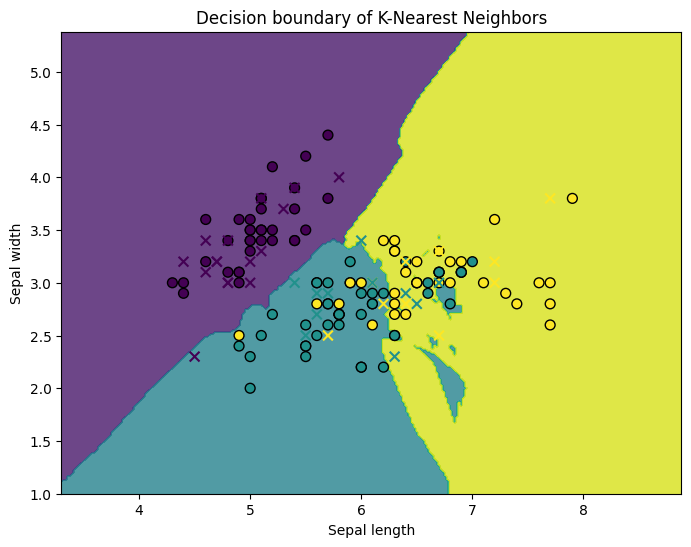

In [61]:
# 绘制决策边界和数据点
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=train_y, edgecolors='k', marker='o', s=50)
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=test_y, edgecolors='r', marker='x', s=50)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision boundary of K-Nearest Neighbors')
plt.show()